In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
#Read Data
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv', index_col = ['Id'])
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv', index_col = ['Id'])

print('Train shape', train.shape)
print('Test shape', test.shape)
train.head()

Train shape (1460, 80)
Test shape (1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
X_train_full = train.copy()
y_train = X_train_full['SalePrice'].copy()

# Separate Numerical and Categorical Columns

In [5]:
X_train_numerical = X_train_full.select_dtypes(exclude = 'object').drop('MSSubClass', axis = 1) #MSSubClass is categorical
num_cols = X_train_numerical.columns

print(num_cols)
print(len(num_cols))

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
36


In [6]:
X_train_categorical = X_train_full.select_dtypes(include = 'object')
X_train_categorical['MSSubClass'] = X_train_full['MSSubClass']
cat_cols = X_train_categorical.columns
print(cat_cols)
print(len(cat_cols))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass'],
      dtype='object')
44


In [7]:
X_train_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   YearBuilt      1460 non-null   int64  
 5   YearRemodAdd   1460 non-null   int64  
 6   MasVnrArea     1452 non-null   float64
 7   BsmtFinSF1     1460 non-null   int64  
 8   BsmtFinSF2     1460 non-null   int64  
 9   BsmtUnfSF      1460 non-null   int64  
 10  TotalBsmtSF    1460 non-null   int64  
 11  1stFlrSF       1460 non-null   int64  
 12  2ndFlrSF       1460 non-null   int64  
 13  LowQualFinSF   1460 non-null   int64  
 14  GrLivArea      1460 non-null   int64  
 15  BsmtFullBath   1460 non-null   int64  
 16  BsmtHalfBath   1460 non-null   int64  
 17  FullBath       1460 non-null   int64  
 18  HalfBath     

# Plot data for cleaning

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

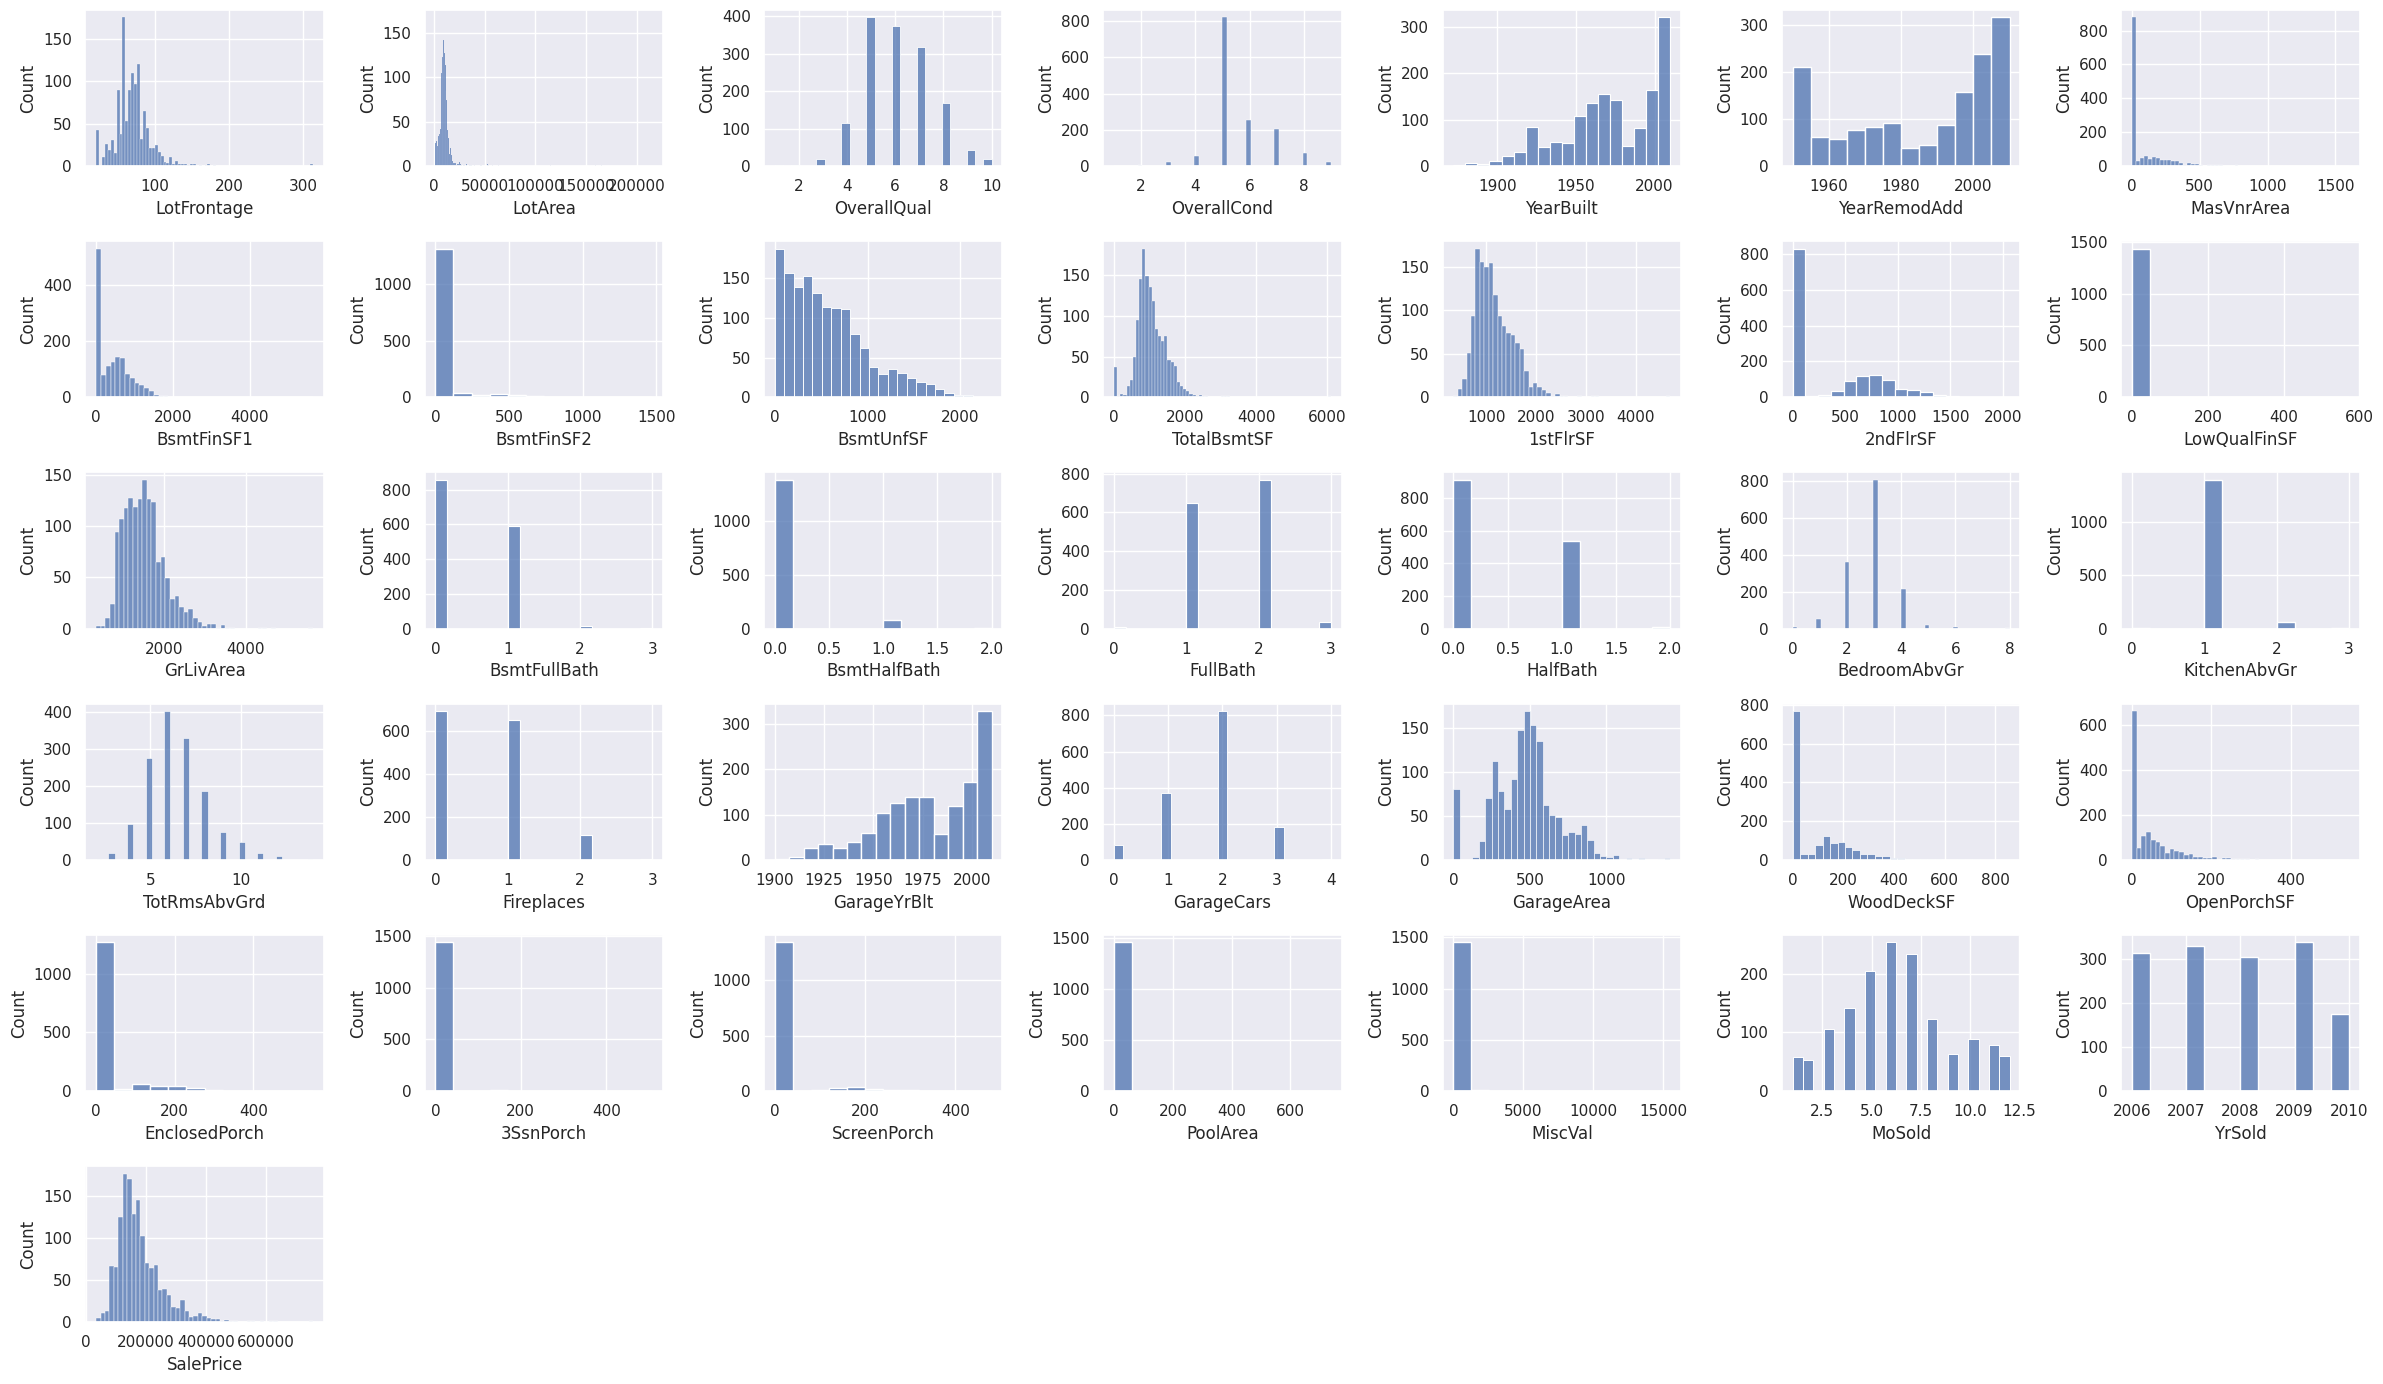

In [8]:
fig = plt.figure(figsize = (24,14))
for i in range(len(num_cols)):
    plt.subplot(6,7,i+1)
    sns.histplot(X_train_numerical[str(num_cols[i])])

fig.tight_layout()


In [9]:
#Some col have most value on 0, ['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']

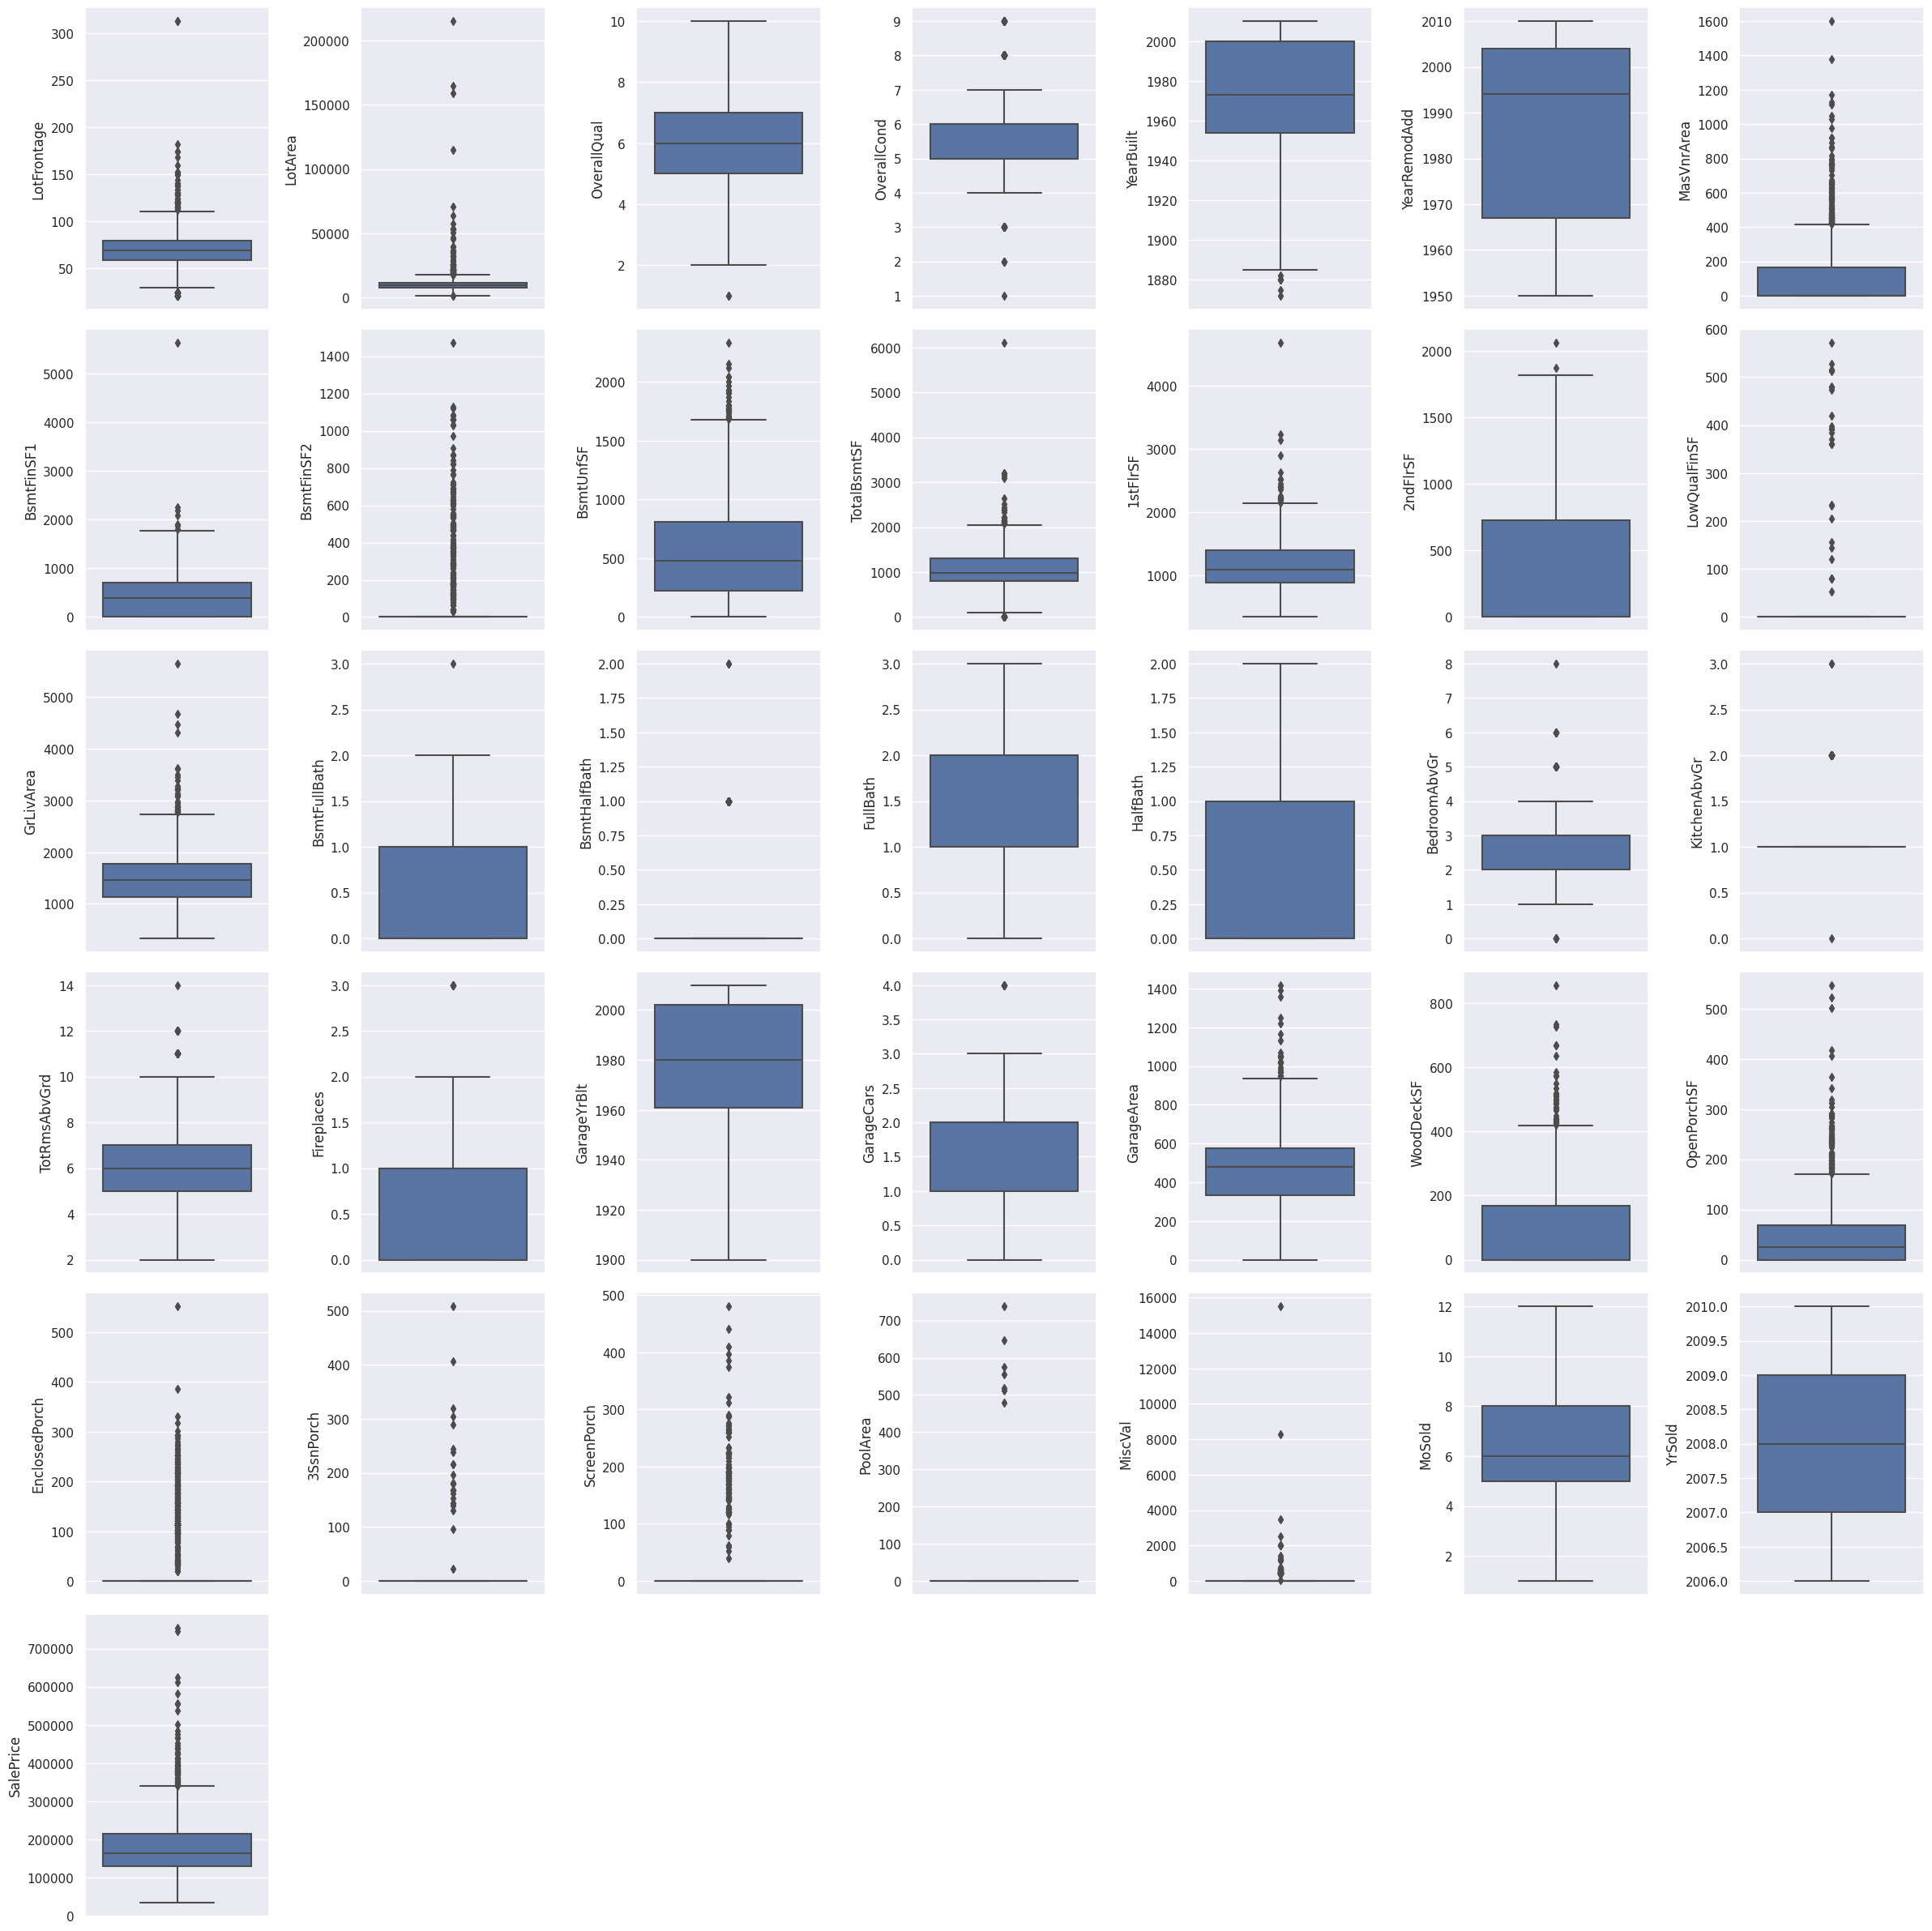

In [10]:
fig = plt.figure(figsize = (24,24))
for i in range(len(num_cols)):
    plt.subplot(6,7,i+1)
    sns.boxplot(data= X_train_numerical, y = num_cols[i])

fig.tight_layout()

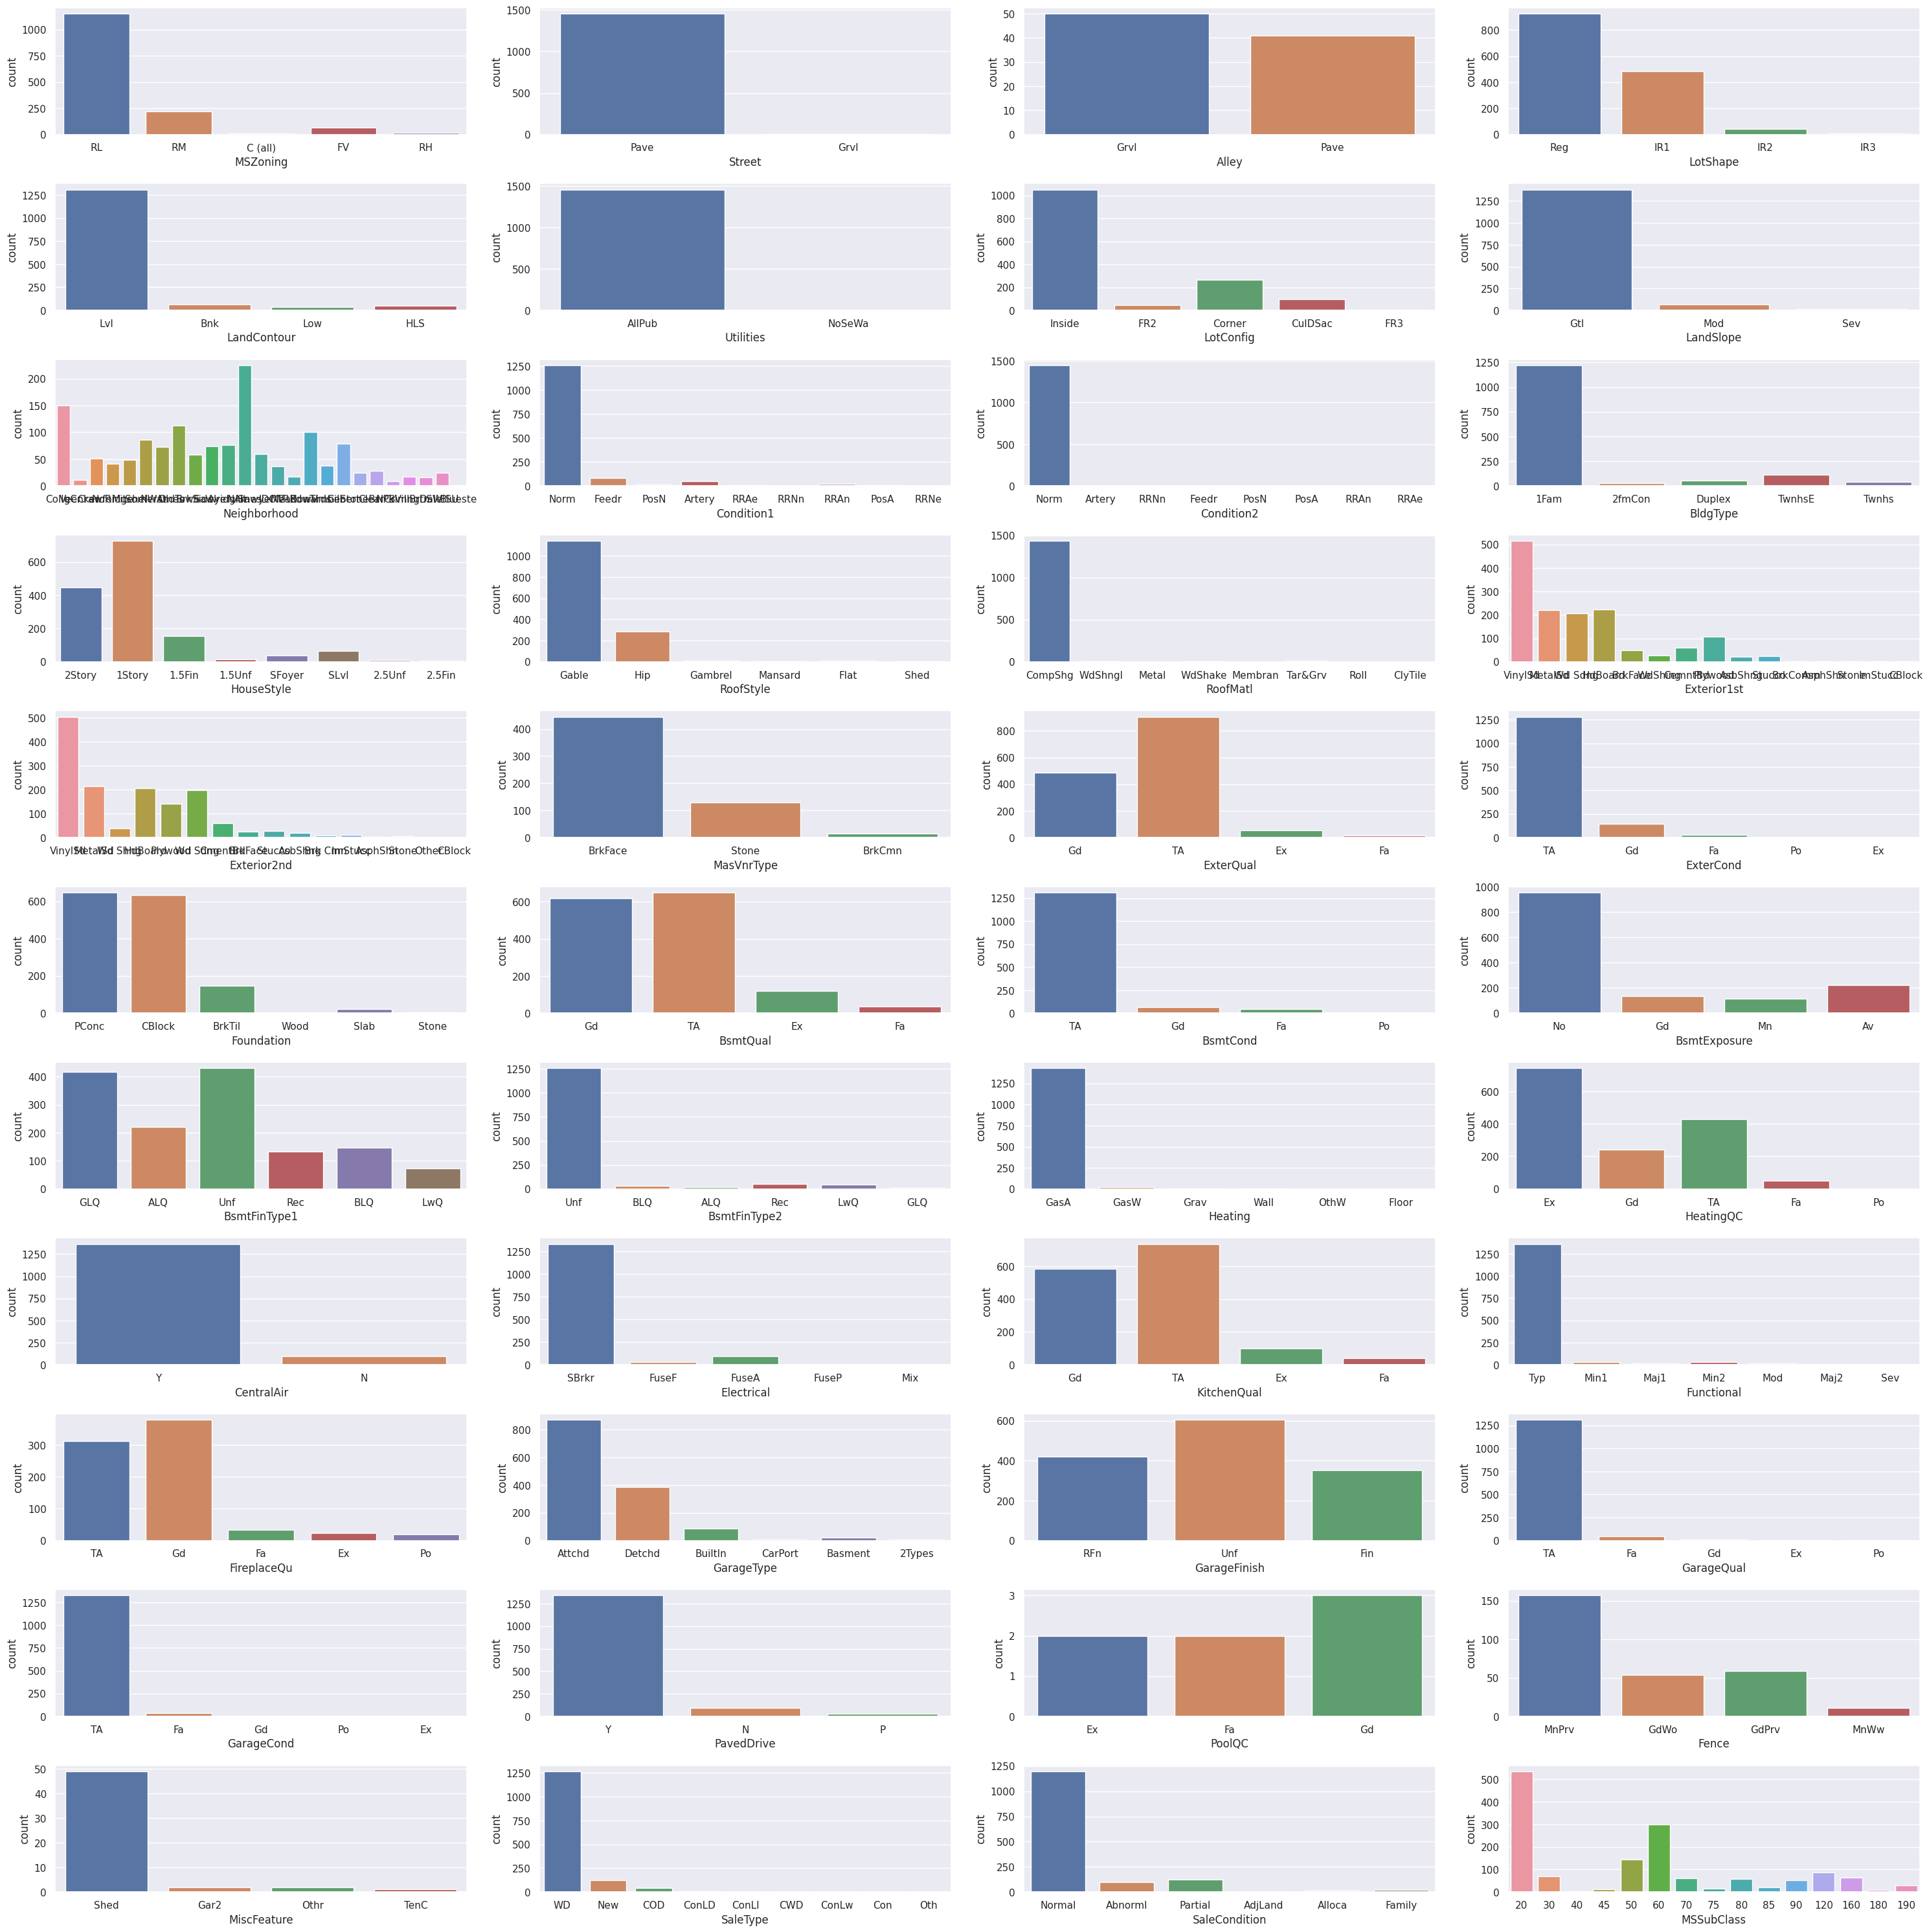

In [11]:
fig = plt.figure(figsize = (30,30))
for i in range(len(cat_cols)):
    plt.subplot(11,4,i+1)
    sns.countplot(X_train_categorical, x = cat_cols[i])

fig.tight_layout()

In [12]:
low_variability_cols = []

threshold = X_train_categorical.shape[0] * 9.5 / 10

for i in range(len(cat_cols)):
    if (X_train_categorical[str(cat_cols[i])].value_counts() > threshold).any():
        low_variability_cols.append(cat_cols[i])

for i in range(len(num_cols)):
    if (X_train_numerical[str(num_cols[i])].value_counts() > threshold).any():
        low_variability_cols.append(num_cols[i])
    
low_variability_cols



['Street',
 'Utilities',
 'Condition2',
 'RoofMatl',
 'Heating',
 'LowQualFinSF',
 'KitchenAbvGr',
 '3SsnPorch',
 'PoolArea',
 'MiscVal']

# Plot Dependent Features

<Axes: >

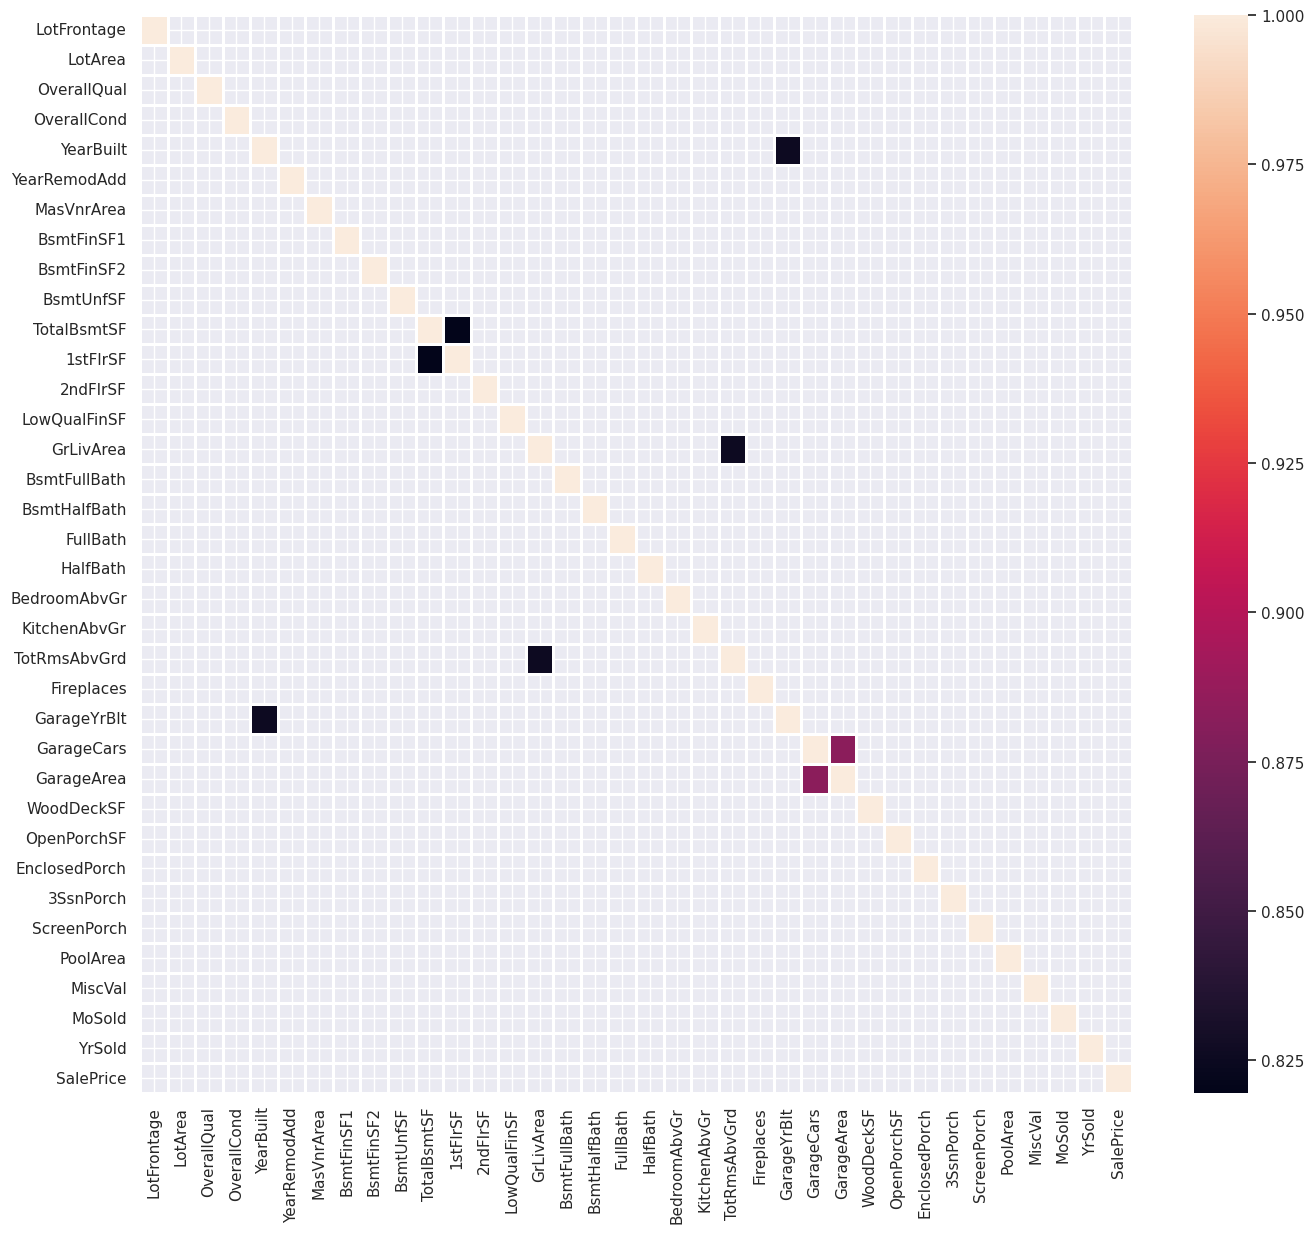

In [13]:
plt.figure(figsize = (16,14))
sns.heatmap(X_train_numerical.corr(), mask = X_train_numerical.corr() < 0.8, linewidth = 1)

In [14]:
#highly dependant features
# ['YearBuilt', 'GarageYrBlt'],
# ['TotRmsAbvGrd','GrLivArea'],
# ['1stFlrSF, TotalBsmtSF'],
# ['GarageArea, GarageCars']

In [15]:
corr_to_label = X_train_numerical.corr()['SalePrice'].sort_values(ascending = False)
corr_to_label

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [16]:
threshold = 0.02

low_corr_cols = []

for i in range(len(corr_to_label.values)):
    if (corr_to_label.iloc[i] < threshold) & (corr_to_label.iloc[i] > (threshold*-1)) :
        low_corr_cols.append(corr_to_label.index[i])

low_corr_cols

['BsmtFinSF2', 'BsmtHalfBath']

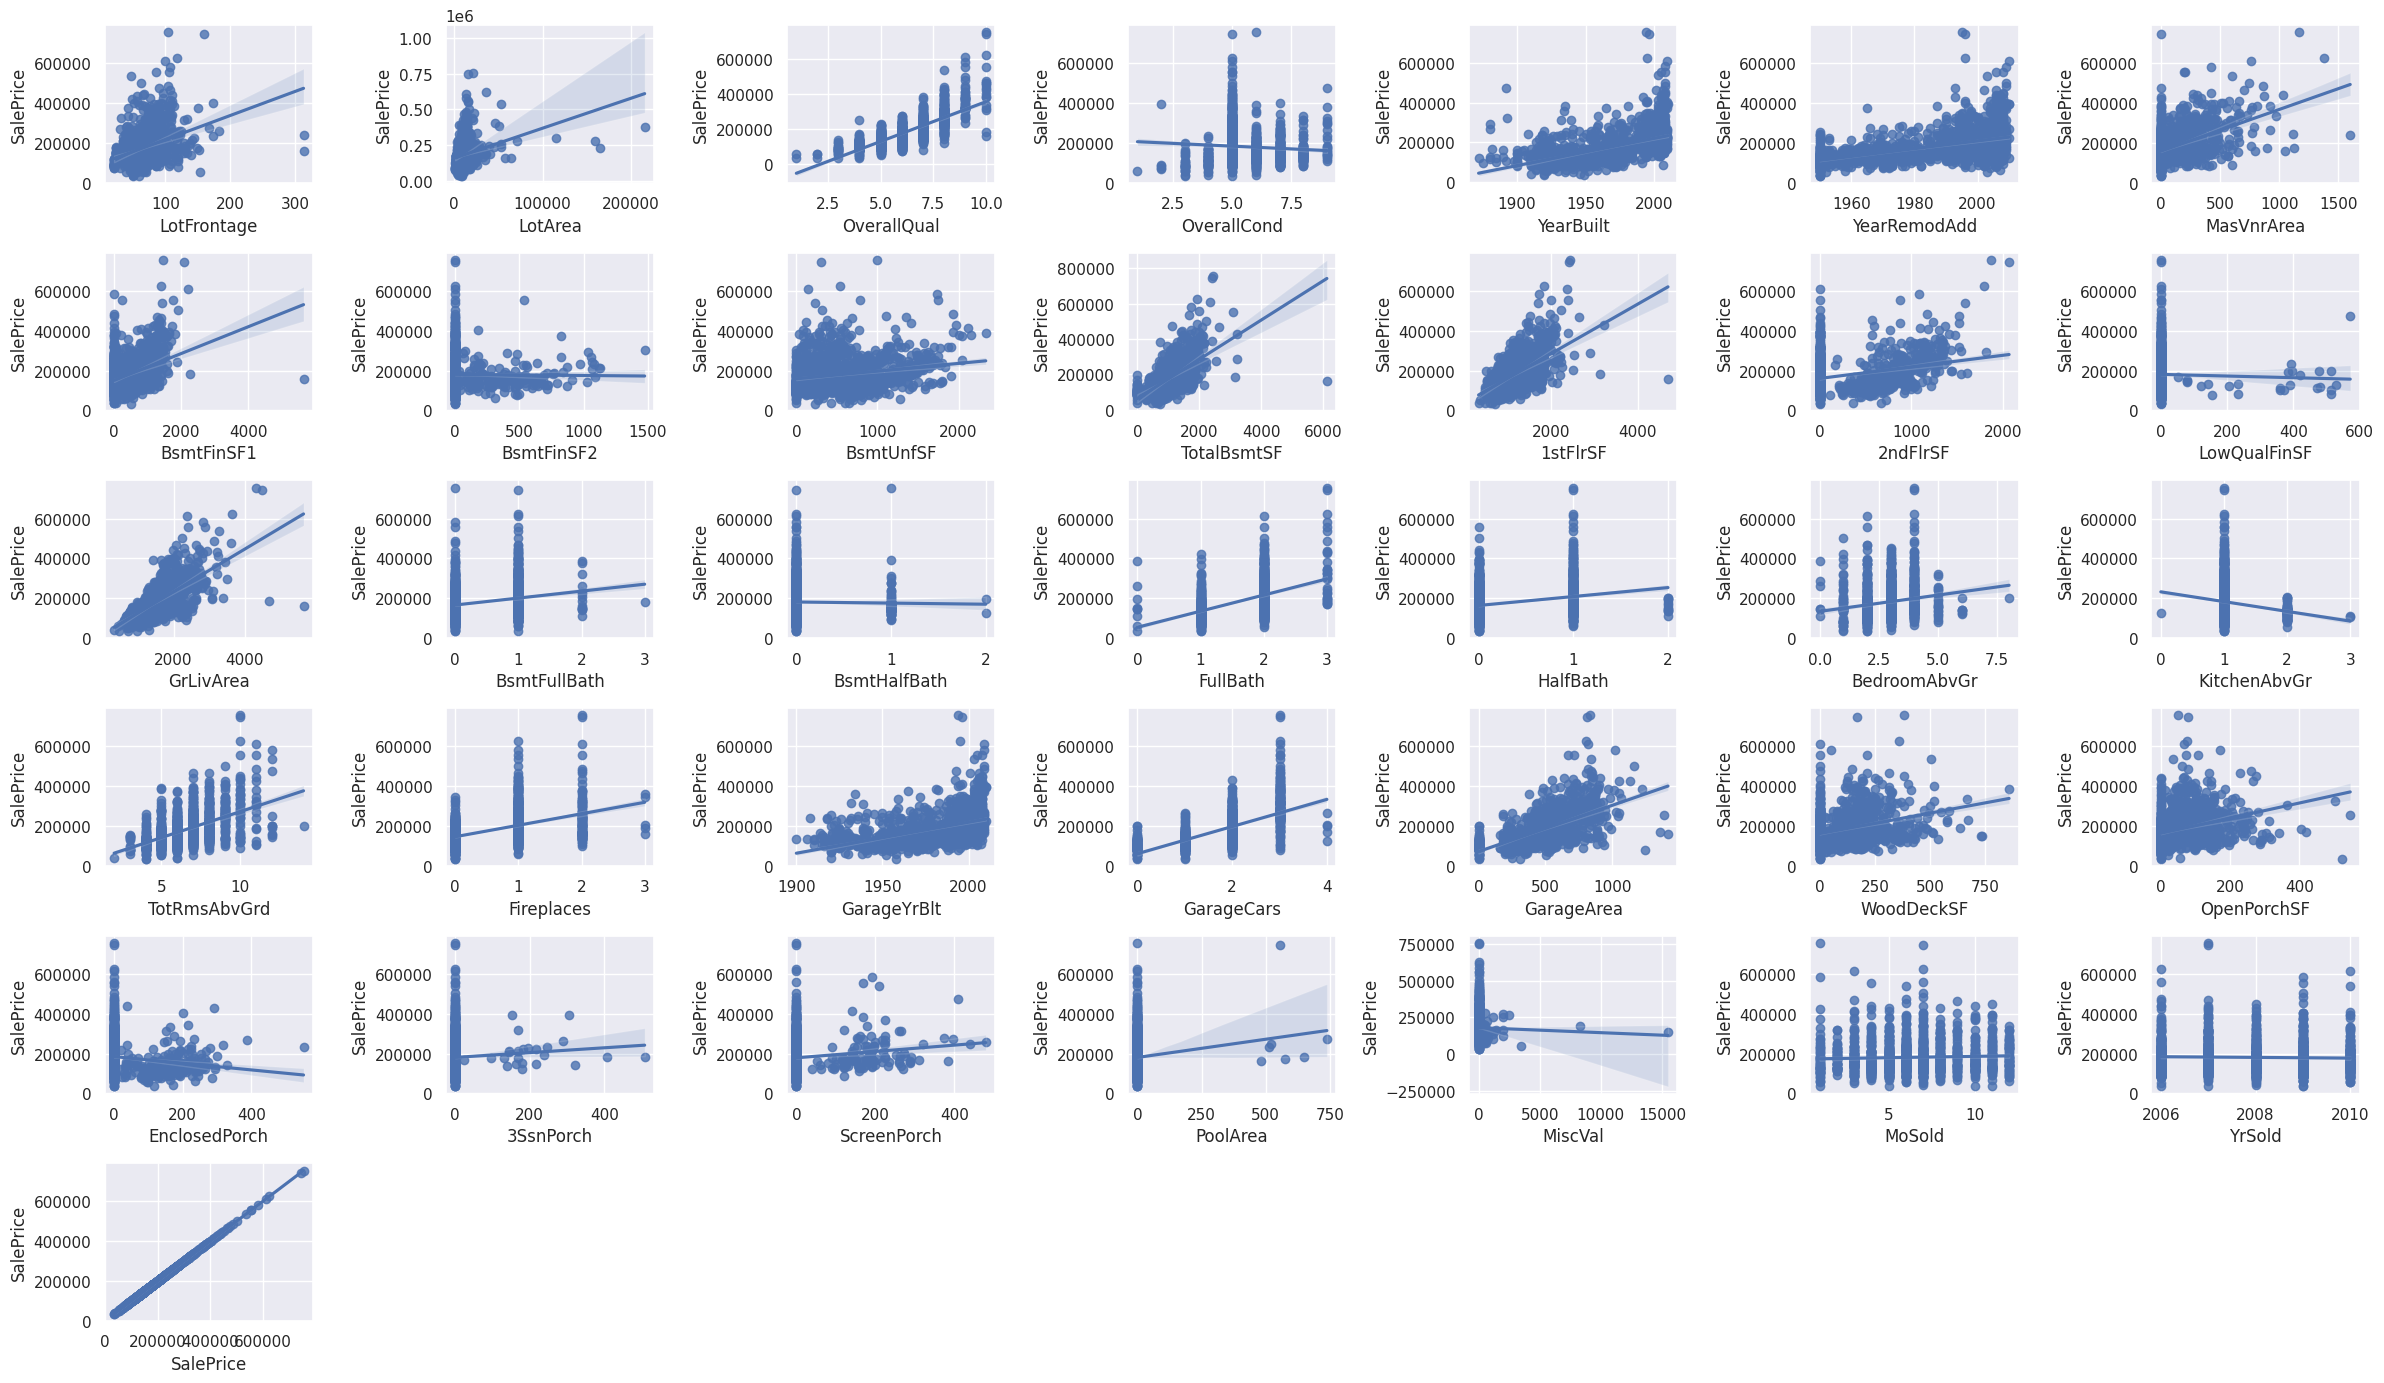

In [17]:
fig = plt.figure(figsize = (24,14))
for i in range(len(num_cols)):
    plt.subplot(6,7,i+1)
    sns.regplot(data = X_train_numerical, x = str(num_cols[i]), y='SalePrice')

fig.tight_layout()


In [18]:
#Columns that have alot of missing row
total_row = X_train_full.shape[0]
threshold = total_row * 9.5 / 10 
X_train_full.columns[X_train_full.isnull().sum()> threshold]

Index(['PoolQC', 'MiscFeature'], dtype='object')

# Data Preprocessing

In [19]:
#remove some features 
cols_drop = ['PoolQC', 'MiscFeature', 'GarageYrBlt', 'GrLivArea','TotalBsmtSF', 'GarageCars', 'BsmtFinSF2', 'BsmtHalfBath','Street', 'Utilities','Condition2','RoofMatl','Heating','LowQualFinSF','KitchenAbvGr','3SsnPorch','PoolArea', 'MiscVal']
X = X_train_full.drop(cols_drop, axis = 1).copy()
print(X.shape)
X.head()
# X_train_full.info

#highly dependant features
# ['YearBuilt', 'GarageYrBlt'],
# ['TotRmsAbvGrd','GrLivArea'],
# ['1stFlrSF, TotalBsmtSF'],
# ['GarageArea, GarageCars']

(1460, 62)


,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,NaN,Reg,Lvl,Inside,Gtl,CollgCr,...,0,61,0,0,NaN,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,NaN,Reg,Lvl,FR2,Gtl,Veenker,...,298,0,0,0,NaN,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,NaN,IR1,Lvl,Inside,Gtl,CollgCr,...,0,42,0,0,NaN,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,NaN,IR1,Lvl,Corner,Gtl,Crawfor,...,0,35,272,0,NaN,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,NaN,IR1,Lvl,FR2,Gtl,NoRidge,...,192,84,0,0,NaN,12,2008,WD,Normal,250000


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 62 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Alley          91 non-null     object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  YearBuilt      1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  Exterior1st  

In [21]:
from sklearn.model_selection import train_test_split
# Obtain target and predictors
y = X.pop('SalePrice')

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [22]:
X_object = X.select_dtypes(include='object')
low_cardinality_cols = X_object.columns[X_object.nunique() < 10]
high_cardinality_cols = X_object.columns[X_object.nunique() >= 10]

numerical_cols = X.select_dtypes(include = ['int64', 'float64']).columns
print(numerical_cols)
print(low_cardinality_cols)
print(high_cardinality_cols)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold',
       'YrSold'],
      dtype='object')
Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')
Index(['Neighborhood', 'Exterior1st', 'Exterior2nd'], dtype='object')


In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

numerical_transformer = SimpleImputer(strategy = 'constant', fill_value= 0)

low_categorical_transformer = Pipeline(steps=[
    ('imputer' , SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

high_categorical_transformer = Pipeline(steps=[
    ('imputer' , SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value = -1))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('locat', low_categorical_transformer, low_cardinality_cols),
        ('hicat', high_categorical_transformer, high_cardinality_cols)
    ]
)

# Creating Model

In [24]:
from sklearn.metrics import mean_absolute_error
# from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

model = xgb.XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 500, subsample= 0.6, random_state = 0)

my_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', model)
])

# param_grid = {
#     'model__n_estimators': [100, 200, 400],
#     'model__learning_rate': [0.01, 0.1, 0.3],
#     'model__max_depth': [None, 3, 5, 7],
#     'model__subsample': [0,2,0,4, 0.6]
# }


# grid_search = GridSearchCV(estimator= my_pipeline, param_grid = param_grid, cv=5, scoring ='neg_mean_absolute_error', n_jobs = -1, verbose = 1)

# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

my_pipeline.fit(X_train, y_train)
y_pred = my_pipeline.predict(X_valid)
mean_absolute_error(y_valid, y_pred)

16452.93244327911

In [25]:
y_test_pred = my_pipeline.predict(test)

In [26]:
output = pd.DataFrame(data = {
    'Id': test.index,
    'SalePrice' : y_test_pred
                             })
output.to_csv('submission.csv', index=False)